In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('obesity.csv')
df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### Attributes related with eating habits are:
Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

### Attributes related with the physical condition are:
Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [842]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

<Figure size 1000x500 with 0 Axes>

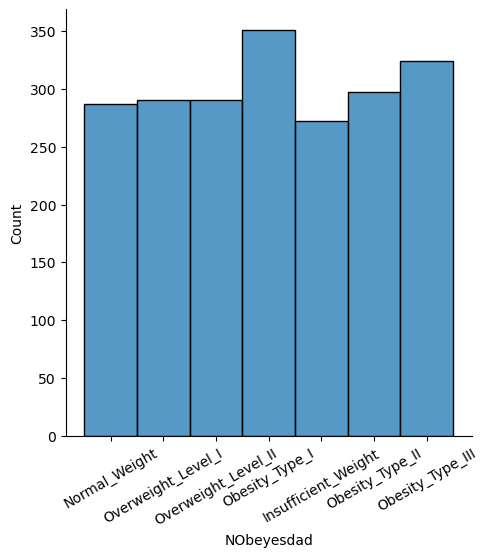

In [843]:
# order = ()
plt.figure(figsize=(10,5))
sns.displot(df['NObeyesdad'], palette="Blues")
plt.xticks(rotation=30)

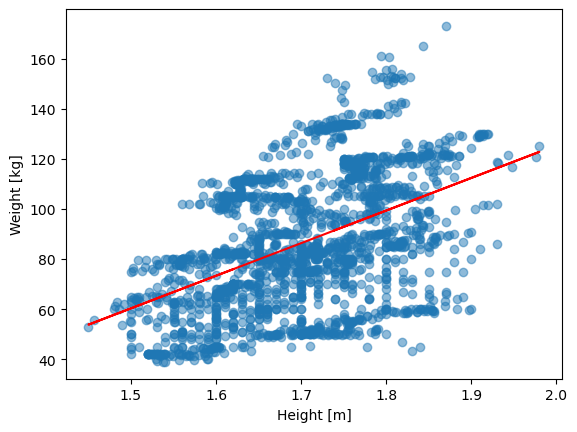

In [844]:
plt.scatter(df["Height"], df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
# plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

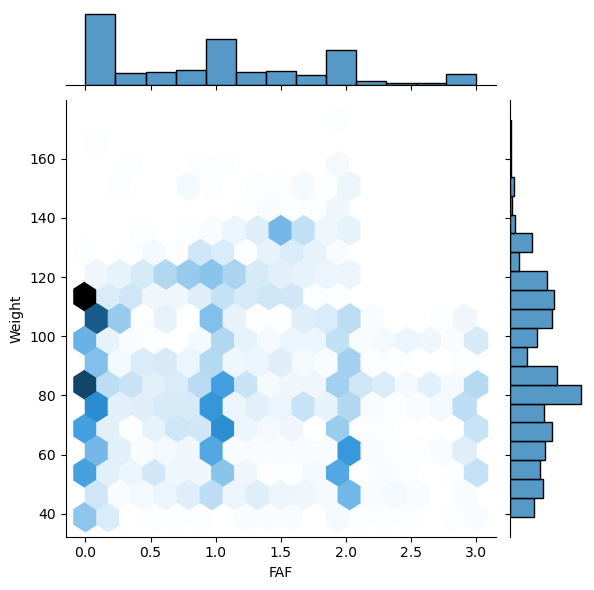

In [845]:
sns.jointplot(x='FAF',y='Weight',data=df,kind='hex')

Text(0.5, 9.444444444444438, 'Weight [kg]')

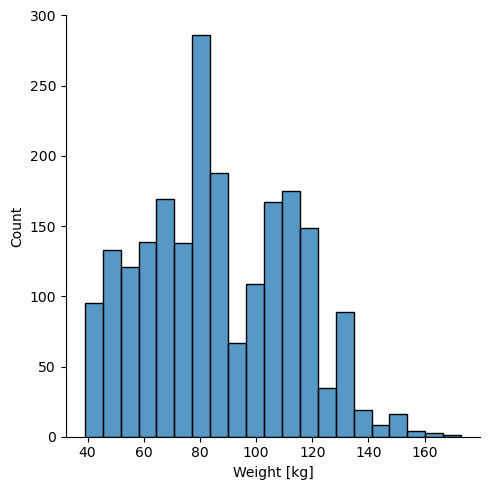

In [846]:
sns.displot(df['Weight'], palette = "Blues_r")
plt.xlabel("Weight [kg]")

Text(0.5, 9.444444444444438, 'Height [m]')

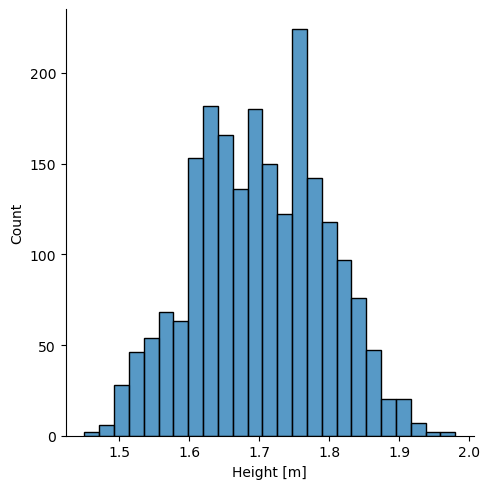

In [847]:
sns.displot(df['Height'], palette = "Blues_r")
plt.xlabel("Height [m]")

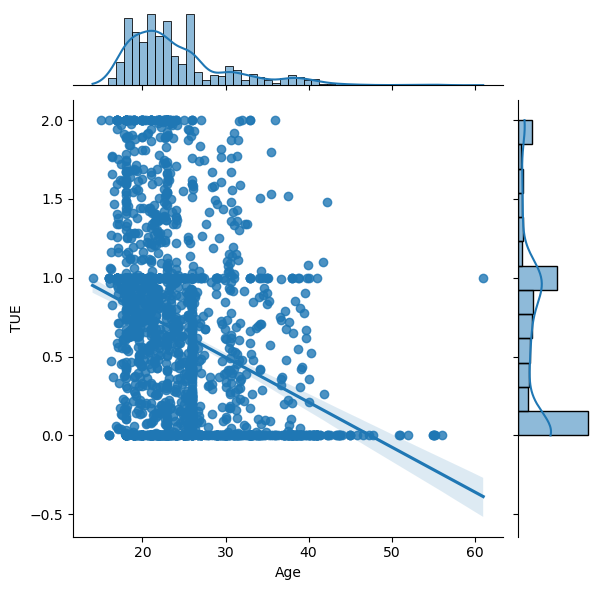

In [848]:
sns.jointplot(x='Age',y='TUE',data=df,kind='reg')

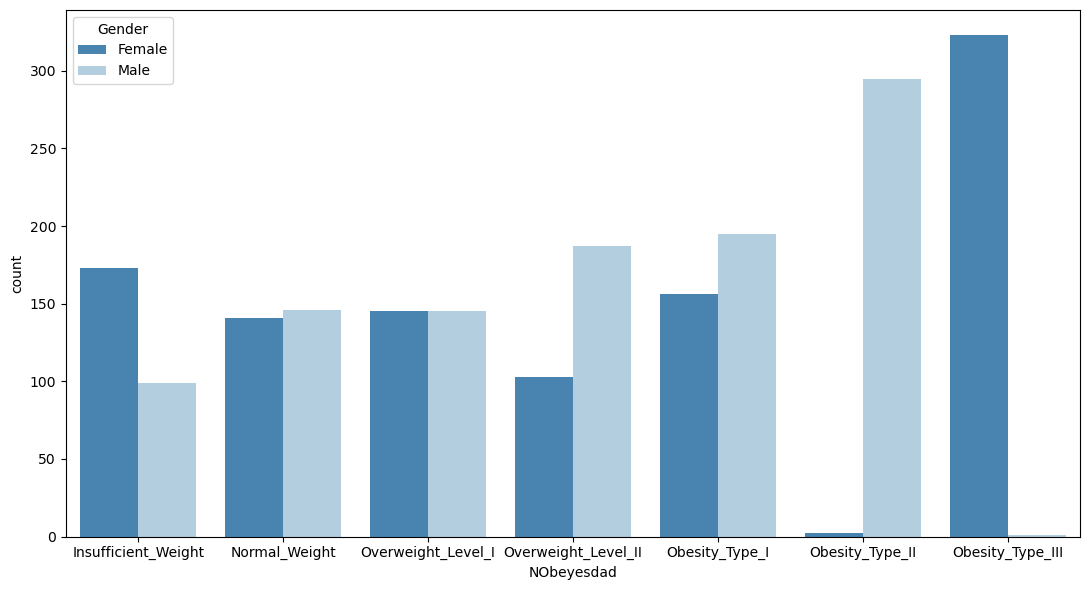

In [849]:
plt.figure(figsize=(11,6))
sns.countplot(x = "NObeyesdad", hue = "Gender", data = df, order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], palette = "Blues_r")
plt.tight_layout()    
plt.show()


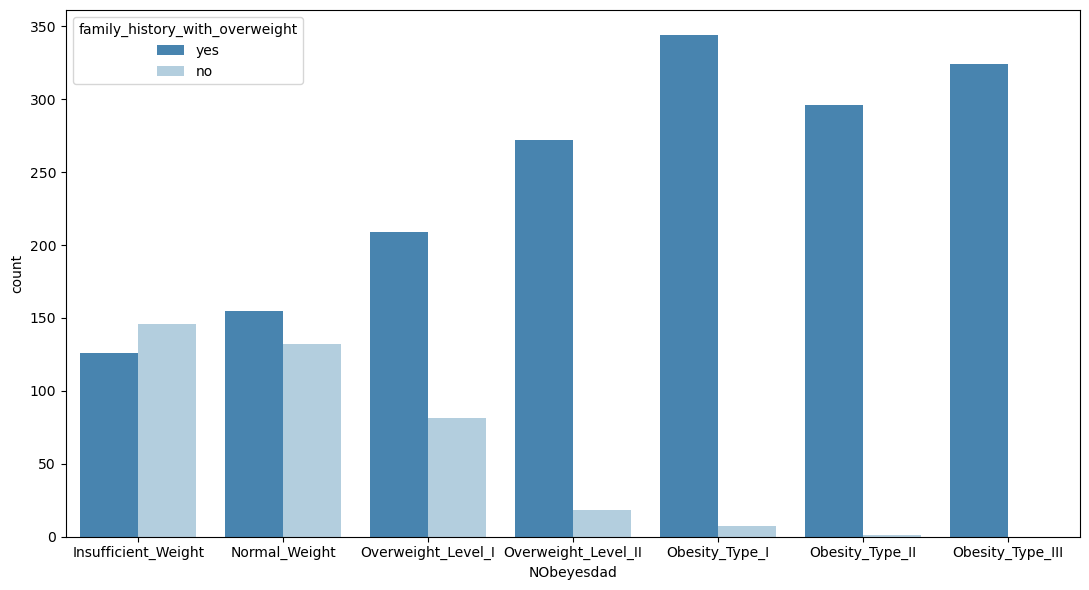

In [850]:
plt.figure(figsize=(11,6))
sns.countplot(x = "NObeyesdad", hue = "family_history_with_overweight", data = df, order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], palette = "Blues_r")
plt.tight_layout()    
plt.show()


In [851]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

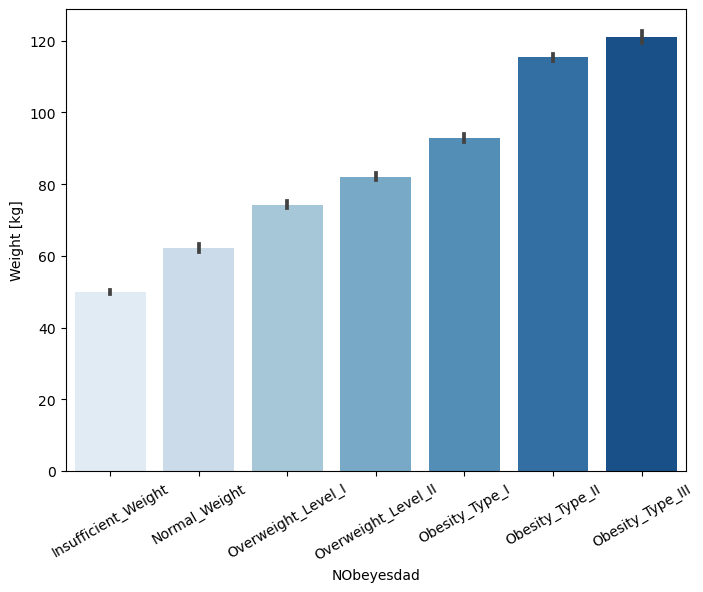

In [852]:
order = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
plt.figure(figsize=(8, 6))
sns.barplot(x='NObeyesdad', y= 'Weight',data=df, order = order, palette="Blues")
plt.ylabel('Weight [kg]')
plt.xticks(rotation=30)


In [853]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [854]:
# df['Age'].astype(str).astype(float)
# df['Height'].astype(str).astype(float)
# df['Weight'].astype(str).astype(float)
# df['FCVC'].astype(str).astype(float)
# df['NCP'].astype(str).astype(float)
# df['CH2O'].astype(str).astype(float)
# df['FAF'].astype(str).astype(float)
# df['TUE'].astype(str).astype(float)

In [855]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
)
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [856]:
from sklearn.model_selection  import train_test_split

In [857]:
X = df.iloc[:,:-1]
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [858]:
class_names = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

In [859]:
y = df.iloc[:,-1].replace(class_names,[class_names.index(i) for i in class_names])
y

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64

# Split Training and Testing dataset

In [860]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [861]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1477, 16), (634, 16), (1477,), (634,))

In [862]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1930,Female,25.982113,1.627818,105.428628,yes,yes,3.000000,3.000000,Sometimes,no,1.480750,no,0.098043,0.663492,Sometimes,Public_Transportation
1803,Female,26.000000,1.656320,111.933010,yes,yes,3.000000,3.000000,Sometimes,no,2.774014,no,0.000000,0.138418,Sometimes,Public_Transportation
1198,Male,18.000000,1.750097,86.372141,yes,yes,2.907062,3.000000,Sometimes,no,2.740848,no,1.219827,0.037634,Sometimes,Public_Transportation
15,Female,22.000000,1.700000,66.000000,yes,no,3.000000,3.000000,Always,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation
816,Male,23.451595,1.670227,75.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.129163,1.983678,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


# Fit and transform

In [863]:
# Fit the column transformer to the data
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# SVC

In [864]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report

In [865]:
from sklearn.svm import SVC

svc_model = SVC(C = 10)
svc_model.fit(X_train, y_train)
svc_model

SVC(C=10)

In [866]:
y_svc_pred = svc_model.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test,y_pred=y_svc_pred)} \n')
print(classification_report(y_test,y_pred=y_svc_pred))

Accuracy score: 0.8785488958990536 

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        86
           1       0.74      0.73      0.74        93
           2       0.78      0.74      0.76        88
           3       0.79      0.81      0.80        79
           4       0.94      0.94      0.94       102
           5       0.97      0.99      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.88       634
   macro avg       0.87      0.88      0.87       634
weighted avg       0.88      0.88      0.88       634



In [867]:
def plotConFusionMatrix(y_test, y_pred):
    cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='Blues')

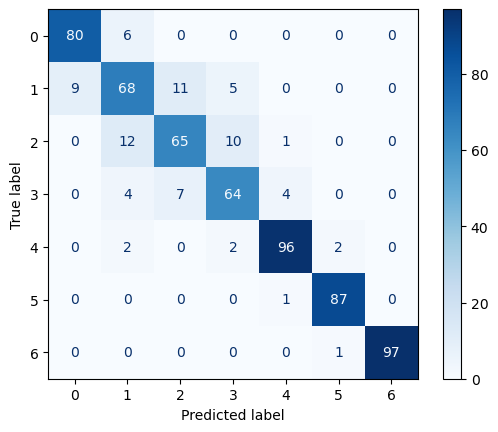

In [868]:
plotConFusionMatrix(y_test, y_svc_pred)

In [869]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# K Nearest Neighbors

In [870]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

In [871]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred=y_knn_pred)} \n')
print(classification_report(y_test,y_pred=y_knn_pred))

Accuracy score: 0.7902208201892744 

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        86
           1       0.68      0.48      0.57        93
           2       0.71      0.65      0.68        88
           3       0.75      0.77      0.76        79
           4       0.78      0.77      0.78       102
           5       0.86      0.94      0.90        88
           6       0.96      0.99      0.97        98

    accuracy                           0.79       634
   macro avg       0.78      0.79      0.78       634
weighted avg       0.79      0.79      0.78       634



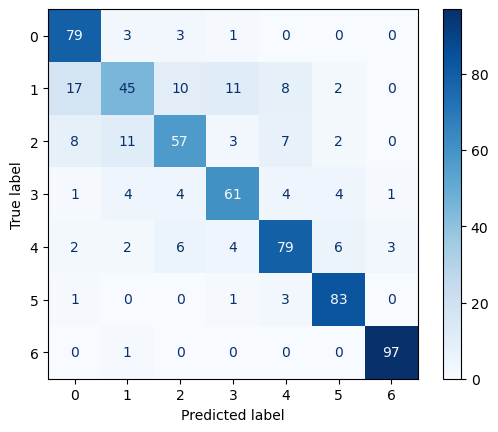

In [872]:
plotConFusionMatrix(y_test, y_knn_pred)

# Decision Tree

In [873]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=2)
dt_model.fit(X_train,y_train)
y_dt_pred = dt_model.predict(X_test)

In [874]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred=y_dt_pred)} \n')
print(classification_report(y_test,y_pred=y_knn_pred))

Accuracy score: 0.9148264984227129 

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        86
           1       0.68      0.48      0.57        93
           2       0.71      0.65      0.68        88
           3       0.75      0.77      0.76        79
           4       0.78      0.77      0.78       102
           5       0.86      0.94      0.90        88
           6       0.96      0.99      0.97        98

    accuracy                           0.79       634
   macro avg       0.78      0.79      0.78       634
weighted avg       0.79      0.79      0.78       634



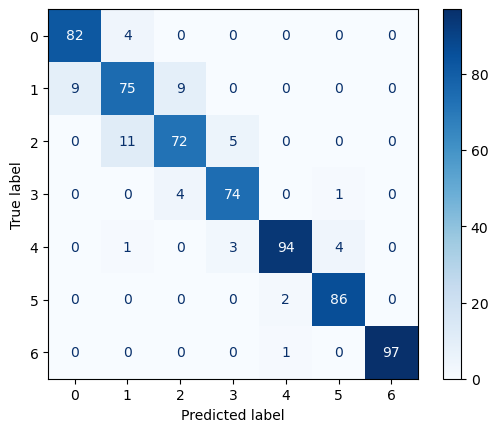

In [875]:
plotConFusionMatrix(y_test, y_dt_pred)

# Random Forest

In [876]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [877]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred=y_rf_pred)} \n')
print(classification_report(y_test,y_pred=y_knn_pred))

Accuracy score: 0.9321766561514195 

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        86
           1       0.68      0.48      0.57        93
           2       0.71      0.65      0.68        88
           3       0.75      0.77      0.76        79
           4       0.78      0.77      0.78       102
           5       0.86      0.94      0.90        88
           6       0.96      0.99      0.97        98

    accuracy                           0.79       634
   macro avg       0.78      0.79      0.78       634
weighted avg       0.79      0.79      0.78       634



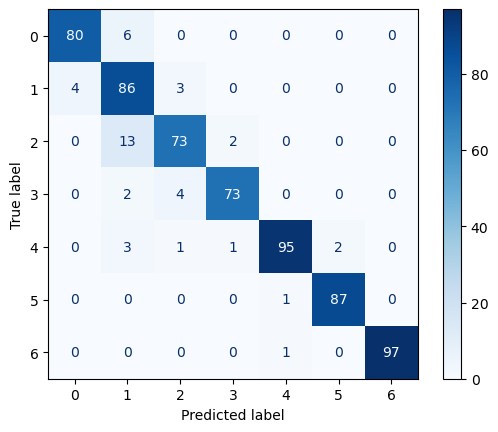

In [878]:
plotConFusionMatrix(y_test,y_rf_pred)

# Neural Network Classifier

In [879]:
import tensorflow as tf

In [895]:
tf.random.set_seed(56)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    # tf.keras.layers.Dense(10, activation = 'relu'),
    # tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(len(class_names), activation = 'softmax'),
])

model.compile(  loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs = 100, verbose = 0,
                    validation_data = (X_test,y_test))

In [896]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9558


[0.1848800778388977, 0.9558359384536743]

<AxesSubplot:>

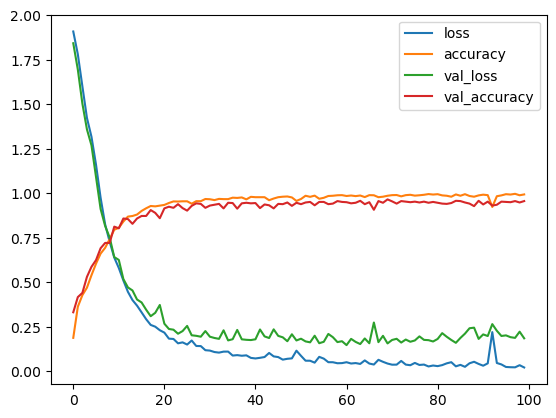

In [897]:
pd.DataFrame(history.history).plot()

In [898]:
def neural_nets_classification(model, X_test):
    y_pred = model.predict(X_test).argmax(axis = 1)
    return y_pred

In [899]:
y_nnc_pred = neural_nets_classification(model = model, X_test = X_test)

20/20 [==============================] - 0s 3ms/step


In [900]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred=y_nnc_pred)} \n')
print(classification_report(y_test,y_pred=y_knn_pred))

Accuracy score: 0.9558359621451105 

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        86
           1       0.68      0.48      0.57        93
           2       0.71      0.65      0.68        88
           3       0.75      0.77      0.76        79
           4       0.78      0.77      0.78       102
           5       0.86      0.94      0.90        88
           6       0.96      0.99      0.97        98

    accuracy                           0.79       634
   macro avg       0.78      0.79      0.78       634
weighted avg       0.79      0.79      0.78       634



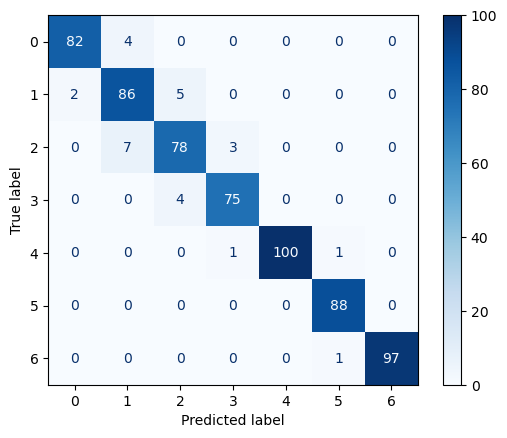

In [901]:
plotConFusionMatrix(y_test,y_nnc_pred)

## Create a random test

In [902]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [903]:
test_data = [["Male",20,1.75,63,"no","no",3,3,"Sometimes","no",5,"no",2,5,"no","Motorbike"],
        ["Female",46,1.80,42,"no","yes",3,3,"Frequently","yes",1,"no",0,1,"Sometimes","Automobile"]]
ran_test = pd.DataFrame(data=test_data, columns=df.columns[:16])
ran_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,20,1.75,63,no,no,3,3,Sometimes,no,5,no,2,5,no,Motorbike
1,Female,46,1.80,42,no,yes,3,3,Frequently,yes,1,no,0,1,Sometimes,Automobile


In [904]:
ran_test = ct.transform(ran_test)

# Test on SVC

In [905]:
for i in svc_model.predict(ran_test):
    print(class_names[i])

Normal_Weight
Insufficient_Weight


# Test on KNN

In [906]:
for i in knn_model.predict(ran_test):
    print(class_names[i])

Obesity_Type_I
Overweight_Level_I


# Test on Decision Tree

In [907]:
for i in dt_model.predict(ran_test):
    print(class_names[i])

Normal_Weight
Insufficient_Weight


# Test on Random Forest

In [908]:
for i in rf_model.predict(ran_test):
    print(class_names[i])

Normal_Weight
Insufficient_Weight


# Test on Neural Network Classification

In [909]:
for i in neural_nets_classification(model, ran_test):
    print(class_names[i])

1/1 [==============================] - 0s 44ms/step
Normal_Weight
Insufficient_Weight
